In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Analysis of Utterances with Minimum Noise

In [490]:
t = pd.read_csv('Primed_Data/Transcripts_CombinedByFile.csv')

In [491]:
t['Count'] = t['transcription'].str.split().str.len()

In [493]:
t['transcription'] = t['transcription'].str.lower()

## Convert Text To Numbers

In [495]:
def is_number(x):
    if type(x) == str:
        x = x.replace(',', '')
    try:
        float(x)
    except:
        return False
    return True

def text2int (textnum, numwords={}):
    textnum = str(textnum)
    units = [
        'zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight',
        'nine', 'ten', 'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen',
        'sixteen', 'seventeen', 'eighteen', 'nineteen',
    ]
    tens = ['', '', 'twenty', 'thirty', 'forty', 'fifty', 'sixty', 'seventy', 'eighty', 'ninety']
    scales = ['hundred', 'thousand', 'million', 'billion', 'trillion']
    ordinal_words = {'first':1, 'second':2, 'third':3, 'fifth':5, 'eighth':8, 'ninth':9, 'twelfth':12}
    #ordinal_endings = [('ieth', 'y'), ('th', '')]
    ordinal_endings = [('ieth', 'y')]


    if not numwords:
        numwords['and'] = (1, 0)
        for idx, word in enumerate(units): numwords[word] = (1, idx)
        for idx, word in enumerate(tens): numwords[word] = (1, idx * 10)
        for idx, word in enumerate(scales): numwords[word] = (10 ** (idx * 3 or 2), 0)

    textnum = textnum.replace('-', ' ')

    current = result = 0
    curstring = ''
    onnumber = False
    lastunit = False
    lastscale = False

    def is_numword(x):
        if is_number(x):
            return True
        if word in numwords:
            return True
        return False

    def from_numword(x):
        if is_number(x):
            scale = 0
            increment = int(x.replace(',', ''))
            return scale, increment
        return numwords[x]

    for word in textnum.split():
        if word in ordinal_words:
            scale, increment = (1, ordinal_words[word])
            current = current * scale + increment
            if scale > 100:
                result += current
                current = 0
            onnumber = True
            lastunit = False
            lastscale = False
        else:
            for ending, replacement in ordinal_endings:
                if word.endswith(ending):
                    word = "%s%s" % (word[:-len(ending)], replacement)

            if (not is_numword(word)) or (word == 'and' and not lastscale):
                if onnumber:
                    # Flush the current number we are building
                    curstring += repr(result + current) + " "
                curstring += word + " "
                result = current = 0
                onnumber = False
                lastunit = False
                lastscale = False
            else:
                scale, increment = from_numword(word)
                onnumber = True

                if lastunit and (word not in scales):                                                                                                                                                                                                                                         
                    # Assume this is part of a string of individual numbers to                                                                                                                                                                                                                
                    # be flushed, such as a zipcode "one two three four five"                                                                                                                                                                                                                 
                    curstring += repr(result + current)                                                                                                                                                                                                                                       
                    result = current = 0                                                                                                                                                                                                                                                      

                if scale > 1:                                                                                                                                                                                                                                                                 
                    current = max(1, current)                                                                                                                                                                                                                                                 

                current = current * scale + increment                                                                                                                                                                                                                                         
                if scale > 100:                                                                                                                                                                                                                                                               
                    result += current                                                                                                                                                                                                                                                         
                    current = 0                                                                                                                                                                                                                                                               

                lastscale = False                                                                                                                                                                                                              
                lastunit = False                                                                                                                                                
                if word in scales:                                                                                                                                                                                                             
                    lastscale = True                                                                                                                                                                                                         
                elif word in units:                                                                                                                                                                                                             
                    lastunit = True

    if onnumber:
        curstring += repr(result + current)

    return curstring

In [496]:
def rep(text):
    text= str(text)
    text = text.replace("'", "")
    return text

t.transcription.apply(rep)

0                                      on south king drive
1                                         were gonna go in
2                                        teen thirty three
3                                             thirty three
4                            got a person calling for help
                               ...                        
10317    its a boat with a tarp over it theyre just goi...
10318                                                  <x>
10319                              thank you sir thank you
10320                                                  <x>
10321                                             five two
Name: transcription, Length: 10322, dtype: object

In [497]:
t.transcription.fillna('NA', inplace=True)

In [499]:
t['transcription1'] = t.transcription.apply(text2int)

In [500]:
t['transcription1'] = t['transcription1'].str.upper()

In [ ]:
t['Count'] = t['transcription'].str.split().str.len()

In [502]:
t

,Unnamed: 0.1,Unnamed: 0,feed,zone,year,month,day,time,sid,start,...,transcription,notes,file,transcriber,length,idx,filename,Noise,Count,transcription1
0,1181,24388,26296,Zone4,2018,8,10,859,SID-003,60.892,...,on south king drive,NaN,201808100859-179195-26296tjs,tjs,1.600,24889,201808100859-179195-26296,0,4,ON SOUTH KING DRIVE
1,1182,24389,26296,Zone4,2018,8,10,859,SID-003,63.792,...,we're gonna go in,NaN,201808100859-179195-26296tjs,tjs,1.099,24890,201808100859-179195-26296,0,4,WE'RE GONNA GO IN
2,1183,24390,26296,Zone4,2018,8,10,859,SID-004,70.891,...,teen thirty three,NaN,201808100859-179195-26296tjs,tjs,1.100,24891,201808100859-179195-26296,0,3,TEEN 33
3,1184,24391,26296,Zone4,2018,8,10,859,SID-005,73.590,...,thirty three,NaN,201808100859-179195-26296tjs,tjs,1.400,24892,201808100859-179195-26296,0,2,33
4,1185,24392,26296,Zone4,2018,8,10,859,SID-004,76.490,...,got a person calling for help,NaN,201808100859-179195-26296tjs,tjs,2.000,24893,201808100859-179195-26296,0,6,GOT A PERSON CALLING FOR HELP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10317,19141,71073,17692,Zone13,2018,8,10,1632,SID 001,1605.106,...,it's a boat with a tarp over it they're just g...,NaN,201808101632-66905-17692sj,sj,5.366,71739,201808101632-66905-17692,0,23,IT'S A BOAT WITH A TARP OVER IT THEY'RE JUST G...
10318,19142,71074,17692,Zone13,2018,8,10,1632,SID 008,1612.385,...,<x>,NaN,201808101632-66905-17692sj,sj,1.687,71740,201808101632-66905-17692,1,1,<X>
10319,19143,71075,17692,Zone13,2018,8,10,1632,SID 001,1615.411,...,thank you sir thank you,NaN,201808101632-66905-17692sj,sj,1.249,71741,201808101632-66905-17692,0,5,THANK YOU SIR THANK YOU
10320,19144,71076,17692,Zone13,2018,8,10,1632,SID 032,1671.270,...,<x>,NaN,201808101632-66905-17692sj,sj,0.934,71742,201808101632-66905-17692,1,1,<X>


## Remove Stopwords

In [1]:
# stopwords have been decided by Dr. Shomir Wilson, Dr. Chris Graziul and Pranav Venkit

In [389]:
stop = ['i', 'me', 'my','myself','we','our','ours','ourselves','you','you\'re','you\'ve','you\'ll','you\'d','your','yours','yourself','yourselves','it','it\'s','its','itself','they','them','their','theirs','themselves','this','that','that\'ll','these','those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against','between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over','under','again','further','then','once','here','there','all','any','both','each','few','more','most','other','some','such','no','nor','not','only','own','same','so','than','too','very','s','t','can','will','just','on','don\'t','should','should\'ve','now','d','ll','m','o','re','ve','y','ain','aren','aren\'t','couldn','couldn\'t','didn','didn\'t','doesn','doesn\'t','hadn','hadn\'t','hasn','hasn\'t','haven','haven\'t','isn','isn\'t','ma','mightn','mightn\'t','mustn','mustn\'t','needn','needn\'t','shan','shan\'t','shouldn','shouldn\'t','wasn','wasn\'t','weren','weren\'t','won','won\'t','wouldn','wouldn\'t']

In [390]:
t['transcription_Stop'] = t.transcription1.apply(lambda x: [item for item in x if item not in stop])

In [391]:
def listToString(s): 
    
    # initialize an empty string
    str1 = " " 
    
    # return string  
    return (str1.join(s))
        

t['transcription1'] = t.transcription1.apply(listToString)
t['transcription_Stop'] = t.transcription_Stop.apply(listToString)

# Divide into various Zones

In [503]:
z1 = t[t.zone == 'Zone1']
z4 = t[t.zone == 'Zone4']
z8 = t[t.zone == 'Zone8']
z13 = t[t.zone == 'Zone13']

## Top 15 words from all Zones

In [394]:
#Including stopwords
X1 = t.transcription1.str.split(expand=True).stack().value_counts()
X1.head(15)

the     1803
a       1500
<x>     1315
and     1270
you     1208
uh      1104
on       947
to       843
104      738
in       734
i        656
at       591
for      580
that     540
is       463
dtype: int64

In [395]:
#Excluding Stopwords
X2 = t.transcription_Stop.str.split(expand=True).stack().value_counts()
X2.head(15)

<x>        1315
uh         1104
104         738
1           455
got         381
alright     375
oh          351
4           324
okay        298
go          295
south       289
get         256
yeah        241
squad       239
i'm         238
dtype: int64

# Exploration of Utterance Length

In [140]:
t.Count.describe()

count    9656.000000
mean        7.184445
std         8.272211
min         1.000000
25%         2.000000
50%         4.000000
75%         9.000000
max       118.000000
Name: Count, dtype: float64

In [141]:
t['Count1'] =  t['Count'].apply(np.int64)

NameError: name 'StrMethodFormatter' is not defined

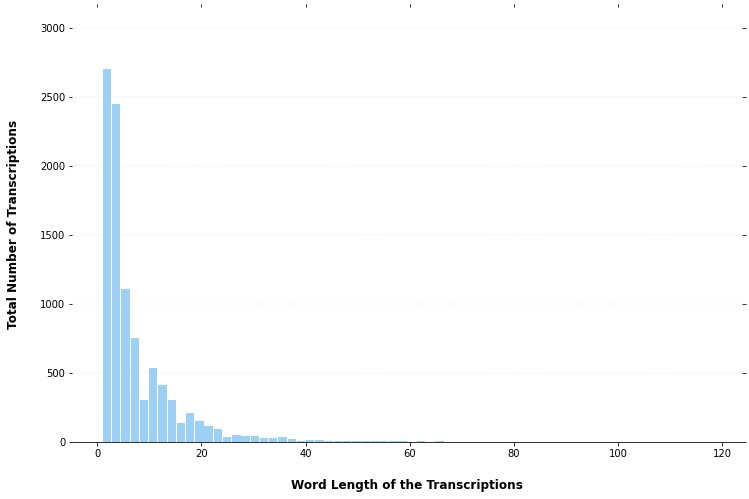

In [142]:
ax = t.hist(column='Count1', bins=66, grid=False, figsize=(12,8), color='#9dd0f5', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Word Length of the Transcriptions", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Total Number of Transcriptions", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [145]:
t.Count1.describe()

count    9656.000000
mean        7.184445
std         8.272211
min         1.000000
25%         2.000000
50%         4.000000
75%         9.000000
max       118.000000
Name: Count1, dtype: float64

In [146]:
t.Count1.median()

4.0

## Find BiGrams of complete corpus 

In [2]:
#function to get bi & trigrams in a df sorted by frequency
from sklearn.feature_extraction.text import CountVectorizer

#Excluding these stopwords as using self-defined stopwords later
#sw = set(stopwords.words('english')) 


def top_n_bi_grams(corpus, n=None):
    #initialise count verctoriser to get bigrams without stopwords
    
    #v = CountVectorizer(ngram_range=(2,3), stop_words=sw)  #uncomment to use nltk stopwords
    v = CountVectorizer(ngram_range=(2,2))
    X = v.fit_transform(corpus)
    bi_tri_df = pd.DataFrame(X.toarray(), columns = v.get_feature_names())
    #sum the values in each columns
    bi_tri_summed = bi_tri_df.sum()
    #rename the columns
    top_n = pd.DataFrame({'ngram': bi_tri_summed.index, 'count':  bi_tri_summed.values})
    #sort and return top n values if given, otherwise just a sorted df
    top_n = top_n.sort_values(by='count', ascending=False).head(n)
    return top_n



#For TriGram
# def top_n_tri_grams(corpus, n=None):
#     #initialise count verctoriser to get bi & trigrams without stopwords
# #     v = CountVectorizer(ngram_range=(2,3), stop_words=sw)
#     v = CountVectorizer(ngram_range=(3,3))
#     X = v.fit_transform(corpus)
#     bi_tri_df = pd.DataFrame(X.toarray(), columns = v.get_feature_names())
#     #sum the values in each columns
#     bi_tri_summed = bi_tri_df.sum()
#     #rename the columns
#     top_n = pd.DataFrame({'ngram': bi_tri_summed.index, 'count':  bi_tri_summed.values})
#     #sort and return top n values if given, otherwise just a sorted df
#     top_n = top_n.sort_values(by='count', ascending=False).head(n)
#     return top_n

/home/pnv5011/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Top 20 bigram in Golden Standard of Transcripts (Including Stopwords)')

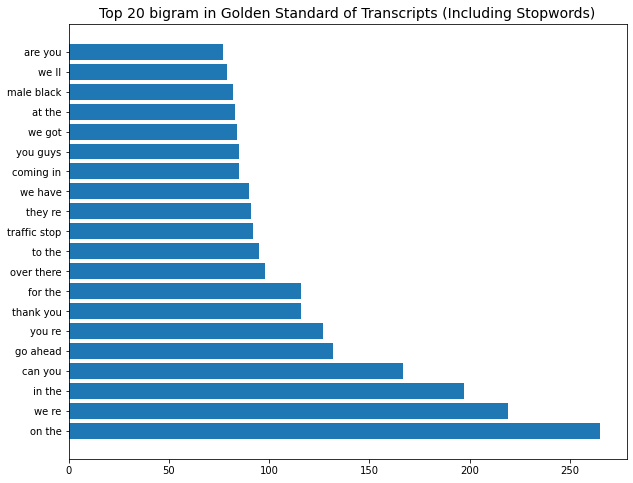

In [149]:
#Visualize the bigram (Not using for now. Creating visualization later.)

#get top 10
top_10_bi = top_n_bi_grams(t['transcription1'],20)

#plot top 10 bi & trigrams
fig, ax = plt.subplots(figsize=(10,8))

labels = top_10_bi['ngram']
x= np.arange(len(labels))
y= top_10_bi['count']

ax.set_yticks(x)
ax.set_yticklabels(labels)
plt.barh(x, width=y)
plt.title("Top 20 bigram in Golden Standard of Transcripts (Including Stopwords)", fontsize=14)

In [3]:
t.transcription1.apply(lambda x: [item for item in x if item not in stop])

In [ ]:
#Invoking the Bigram function
top_10_bi1 = top_n_bi_grams(t['transcription1'],100) #top 100 bigrams of all zones
top_10bi_z4 = top_n_bi_grams(z4['transcription1'],100)   #top 100 bigrams of zone 4
top_10bi_z8 = top_n_bi_grams(z8['transcription1'],100)   #top 100 bigrams of zone 8
top_10bi_z13 = top_n_bi_grams(z13['transcription1'],100) #top 100 bigrams of zone 13

In [ ]:
#Invoking the trigram function
#top_10_tri1 = top_n_tri_grams(t['transcription1'],300) #with stopwords
#top_10_tri2 = top_n_tri_grams(t['transcription_Stop'],20) #without stopwords

In [509]:
# Printing for all zones
top_10_bi1["ngram"]

12606       on the
19116        we re
9495        in the
7723      go ahead
20163       you re
           ...    
16275    the event
1689        79 and
9806      is there
15989      that is
10665        ll be
Name: ngram, Length: 100, dtype: object

In [510]:

top_10_bi1["ngram"] = top_10_bi1["ngram"].str.lower().str.split()
top_10bi_z4["ngram"] = top_10bi_z4["ngram"].str.lower().str.split()
top_10bi_z8["ngram"] = top_10bi_z8["ngram"].str.lower().str.split()
top_10bi_z13["ngram"] = top_10bi_z13["ngram"].str.lower().str.split()

In [511]:
#Function to indicate if bigram contains stopwords

stop = ['i', 'me', 'my','myself','we','our','ours','ourselves','you','you\'re','you\'ve','you\'ll','you\'d','your','yours','yourself','yourselves','it','it\'s','its','itself','they','them','their','theirs','themselves','this','that','that\'ll','these','those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against','between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over','under','again','further','then','once','here','there','all','any','both','each','few','more','most','other','some','such','no','nor','not','only','own','same','so','than','too','very','s','t','can','will','just','on','don\'t','should','should\'ve','now','d','ll','m','o','re','ve','y','ain','aren','aren\'t','couldn','couldn\'t','didn','didn\'t','doesn','doesn\'t','hadn','hadn\'t','hasn','hasn\'t','haven','haven\'t','isn','isn\'t','ma','mightn','mightn\'t','mustn','mustn\'t','needn','needn\'t','shan','shan\'t','shouldn','shouldn\'t','wasn','wasn\'t','weren','weren\'t','won','won\'t','wouldn','wouldn\'t']

def stop_verification(text):
    flag = 0
    for x in text:
        if x in stop:
            flag = 1
    return flag



def listToString(s): 
    
    # initialize an empty string
    str1 = " " 
    
    # return string  
    return (str1.join(s))

In [512]:
top_10_bi1["stop_status"] = top_10_bi1.ngram.apply(stop_verification)
top_10_bi1["ngram"] = top_10_bi1.ngram.apply(listToString)

top_10bi_z4["stop_status"] = top_10bi_z4.ngram.apply(stop_verification)
top_10bi_z4["ngram"] = top_10bi_z4.ngram.apply(listToString)

top_10bi_z8["stop_status"] = top_10bi_z8.ngram.apply(stop_verification)
top_10bi_z8["ngram"] = top_10bi_z8.ngram.apply(listToString)

top_10bi_z13["stop_status"] = top_10bi_z13.ngram.apply(stop_verification)
top_10bi_z13["ngram"] = top_10bi_z13.ngram.apply(listToString)

In [513]:
#Demo output. We see stop_status shows if the bigram contains stopwords
top_10_bi1.head(10)

,ngram,count,stop_status
12606,on the,240,1
19116,we re,206,1
9495,in the,192,1
7723,go ahead,134,0
20163,you re,121,1
5107,can you,120,1
7213,for the,110,1
17545,traffic stop,103,0
12983,over there,100,1
16895,they re,96,1


In [514]:
# Filter out all the bigrams that contain stopwords
result_all = top_10_bi1[top_10_bi1['stop_status'] == 0] 
result_z4 = top_10bi_z4[top_10bi_z4['stop_status'] == 0] 
result_z8 = top_10bi_z8[top_10bi_z8['stop_status'] == 0] 
result_z13 = top_10bi_z13[top_10bi_z13['stop_status'] == 0] 

In [544]:
#Demo Output
result_all.head(12)

,ngram,count,stop_status
4385,go ahead,84,0
10172,traffic stop,81,0
10709,unit coming,39,0
6268,male black,32,0
1479,alright 104,25,0
3819,event number,20,0
8418,shots fired,19,0
3219,cottage grove,19,0
3257,crime scene,19,0
2748,call back,18,0
